<a href="https://colab.research.google.com/github/LifeLiveOn/Assembly-study-guide/blob/main/LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression

In [2]:
import torch
w=torch.tensor(2.0,requires_grad=True)
b=torch.tensor(-1.0,requires_grad=True)

def forward(x):
  y=w*x + b
  return y


tensor([1.], grad_fn=<AddBackward0>)
tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)


In [3]:

x = torch.tensor([1.0])
yhat = forward(x)
print(yhat)
x=torch.tensor([[1],[2]])
yhat=forward(x)
print(yhat)

tensor([1.], grad_fn=<AddBackward0>)
tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)


Class Linear

nn.Module: This is the base class for all neural network modules in PyTorch12. When creating a custom neural network, you typically inherit from nn.Module and define your network architecture within it.



*   nn.Linear: Fully connected layer
*   nn.Conv2d: 2D convolutional layer

*   nn.RNN, nn.LSTM, nn.GRU: Recurrent layers

*   nn.TransformerEncoder, nn.TransformerDecoder: Transformer layers

Activation Functions: torch.nn.functional (often imported as F) provides activation functions like ReLU, sigmoid, and tanh2.






In [4]:
from torch.nn import Linear
torch.manual_seed(1) #
model = Linear(in_features=1,out_features=1) #only 1 input ( number of columns) and 1 output this is a linear function
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


0.5153 is our weight and -0.4414 is our bias

y = 0.5153x+(-0.4414)

from that we define X as a new tensor and pass to our Linear model to predict yhat


In [9]:

x = torch.tensor([0.0])
print(model(x))

x = torch.tensor([[0.0],[1.2]])
yhat = model(x)
yhat


tensor([-0.4414], grad_fn=<ViewBackward0>)


tensor([[-0.4414],
        [ 0.1769]], grad_fn=<AddmmBackward0>)

# Custom models, can have many type of model in our nn class

create LR regression with custom module from nn using

```
nn.Module (inherit from it)
```



```
 state_dict() return a diction nary

 map the keys to our paramters values
 keys = linear.weight, linear.bias
```



```
import torch.nn as nn

class SimpleNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 128)
        self.layer2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = nn.functional.relu(self.layer1(x))
        return self.layer2(x)
```









```
Python dictionary:  OrderedDict([('weight', tensor([[0.5153]])), ('bias', tensor([-0.4414]))])
keys:  odict_keys(['weight', 'bias'])
values:  odict_values([tensor([[0.5153]]), tensor([-0.4414])])

```



In [11]:
from torch import nn
class LR(nn.Module):
  def __init__(self,in_size,output_size):
    super(LR,self).__init__()
    self.linear = nn.Linear(in_size,output_size)
  # prediction
  def forward(self,x):
    out=self.linear(x)
    return out

In [16]:
model = LR(1,1)
#init the weight and bias:
model.state_dict()['linear.weight'].data[0] = torch.tensor([0.5153])
model.state_dict()['linear.bias'].data[0] = torch.tensor([-0.4414])
x = torch.tensor([1.0])
yhat = model(x)
print(yhat)
x = torch.tensor([[1.0],[2.0],[3.0]])
print(model(x))

tensor([0.0739], grad_fn=<ViewBackward0>)
tensor([[0.0739],
        [0.5892],
        [1.1045]], grad_fn=<AddmmBackward0>)


# Train the model
we want to minimize our LOSS find the **slope** that minimze

loss function ... taken predicted input and real value and give us an estimate of how good the model is in prediction how close
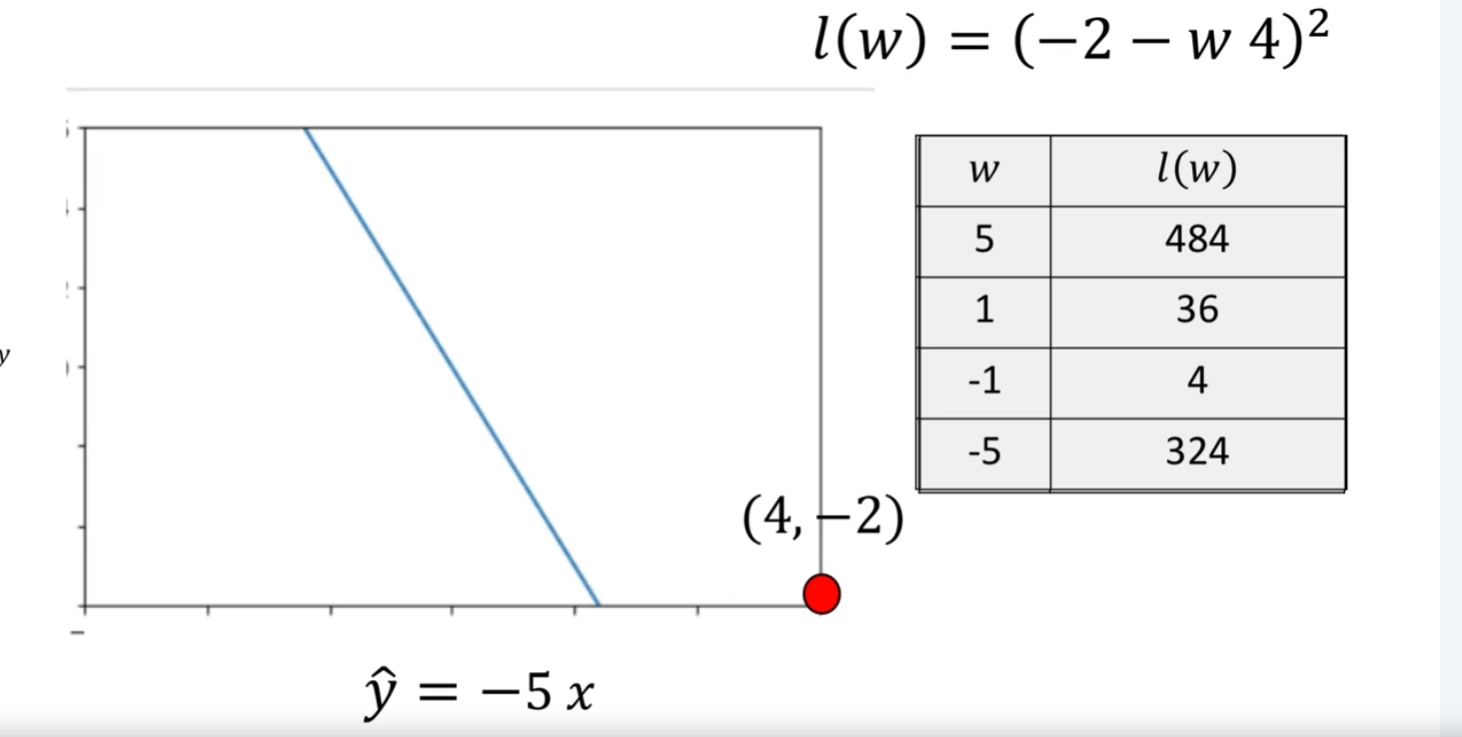



Parameter Space in Neural Networks

Parameter space refers to the multidimensional space where each dimension
represents a parameter of the neural network

selecting a slope of 5:
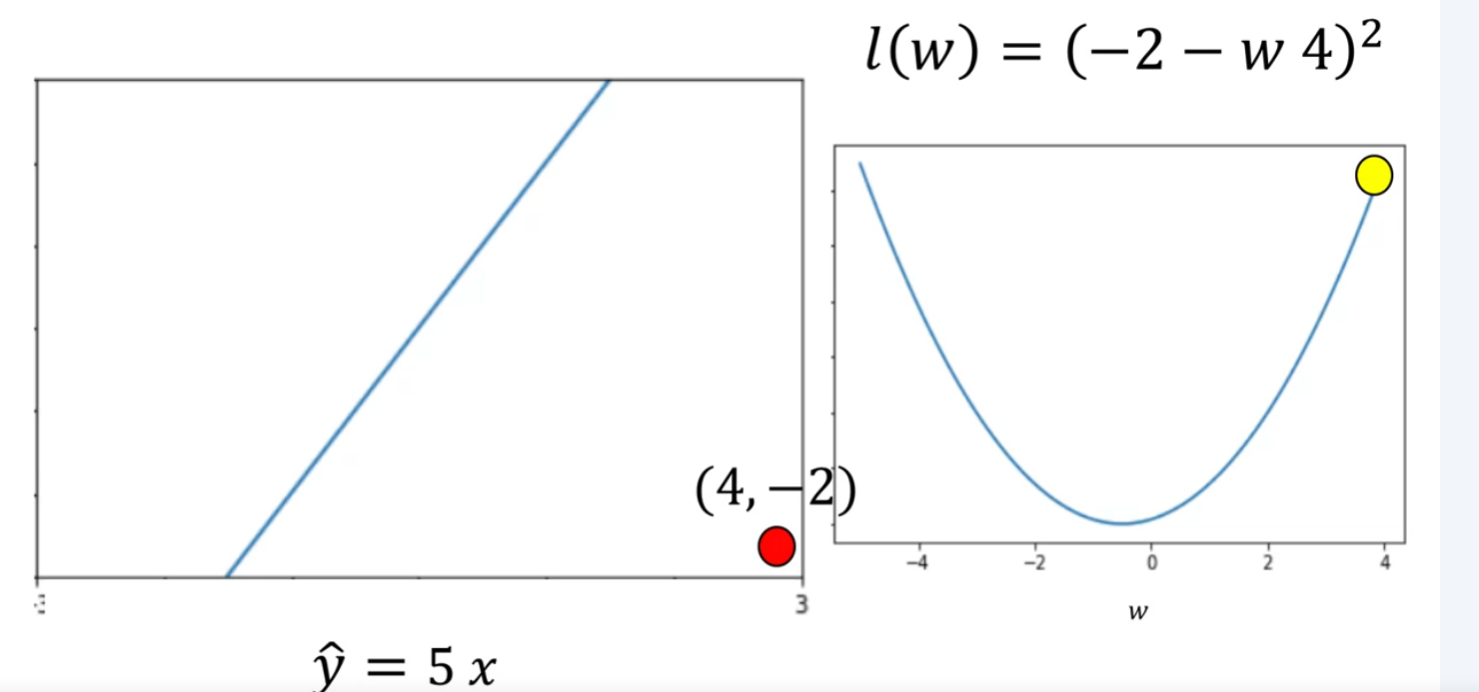

derivative to find the best slope for simple model
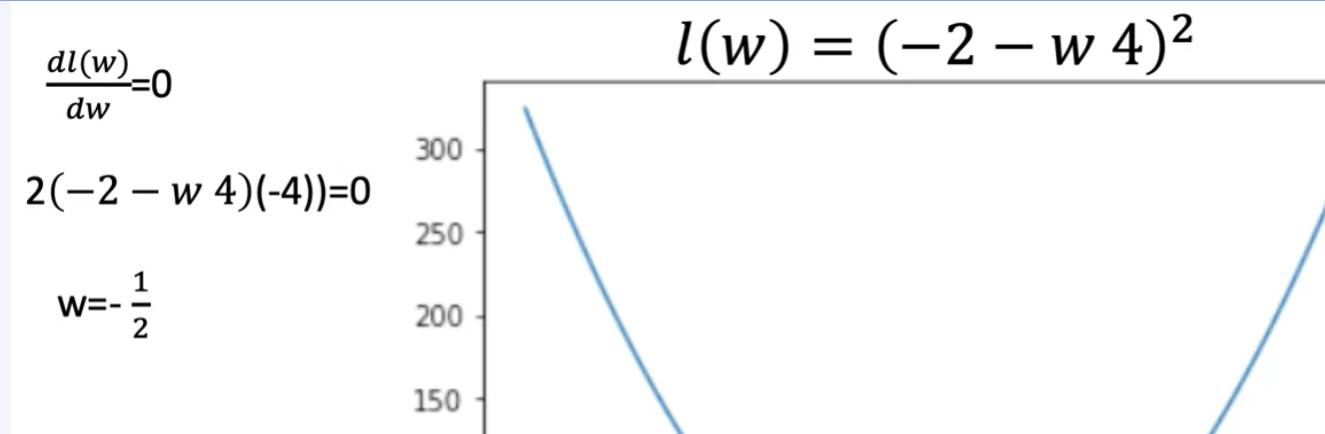

# Gradient Descent its advantages and problems
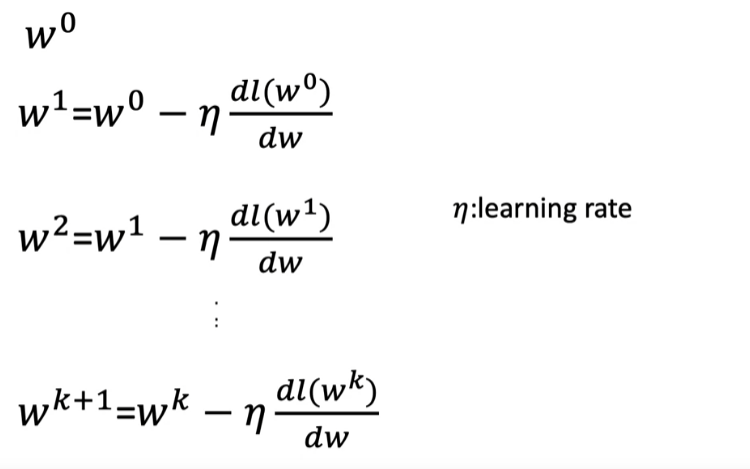

We start off with a guess of our weight and see how well it perform then we go down with our learning rate to find the optimal new weight,
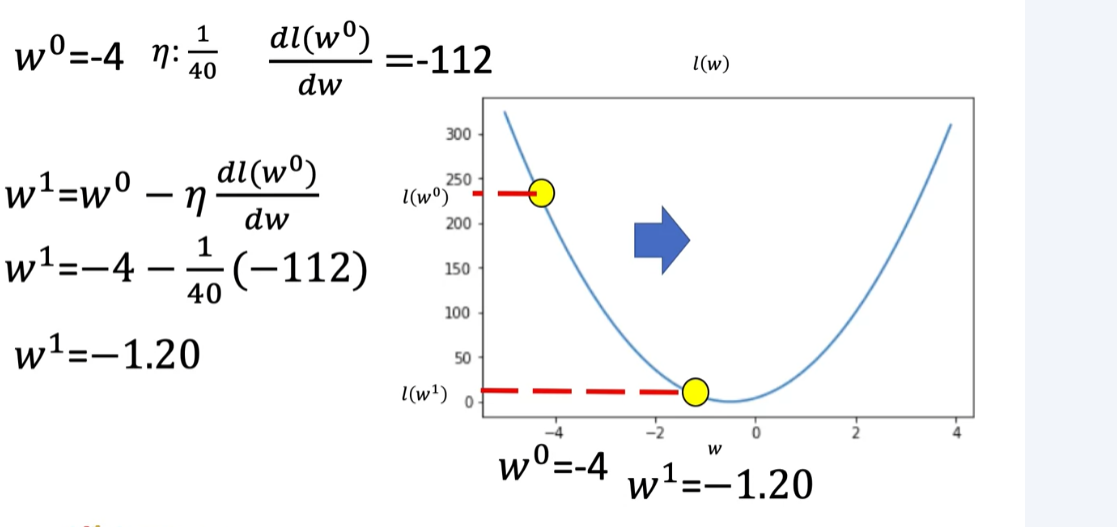

Next interation
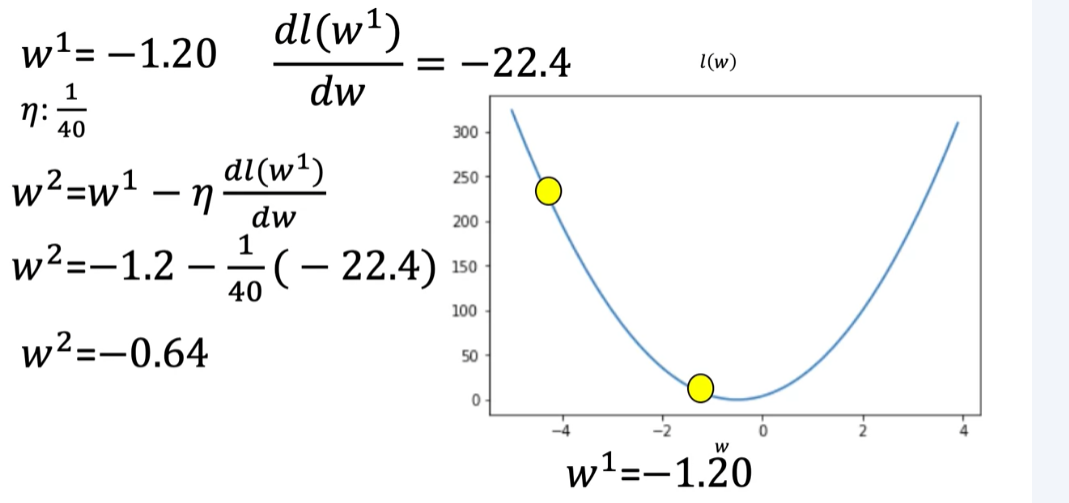

# problem with learning rate


*   Miss the slope that has the lowest min
*   Learn rate to small, the value hardly changes and take a lot of interation



# Standard way when doing Gradient Descent


1.   Number of trials
2.   Record a few interation of Descent and keep going or not if Loss Increase then stop




# Cost function is the average or total loss
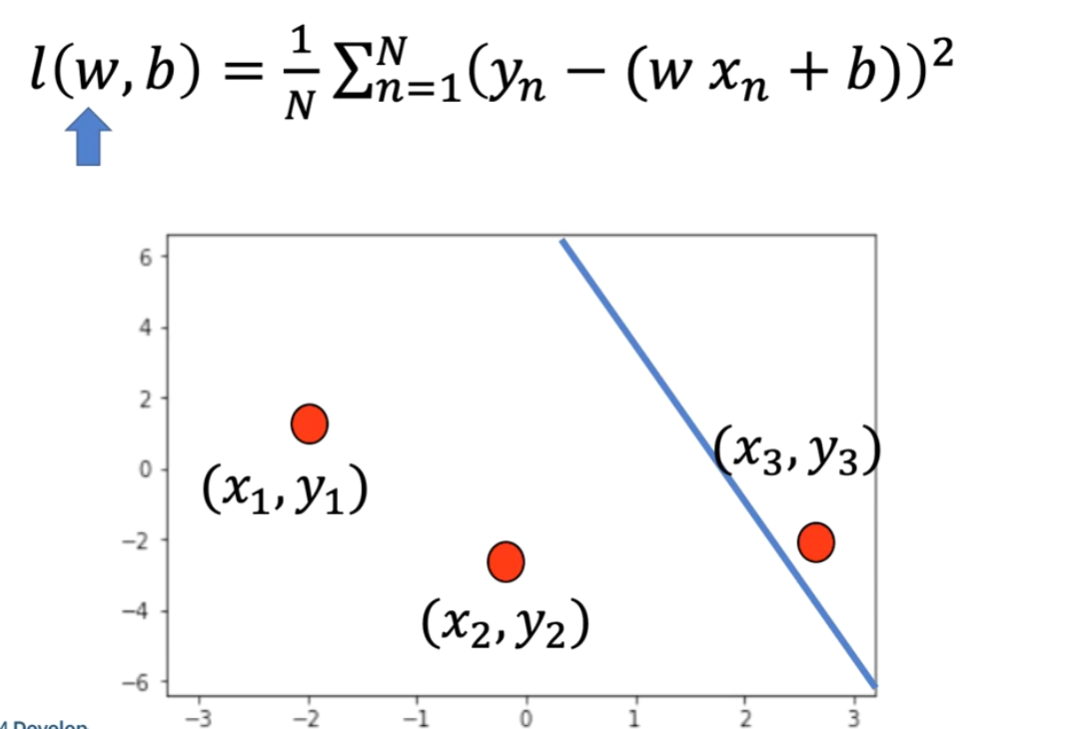

# Linear Regression PyTorch and Grad

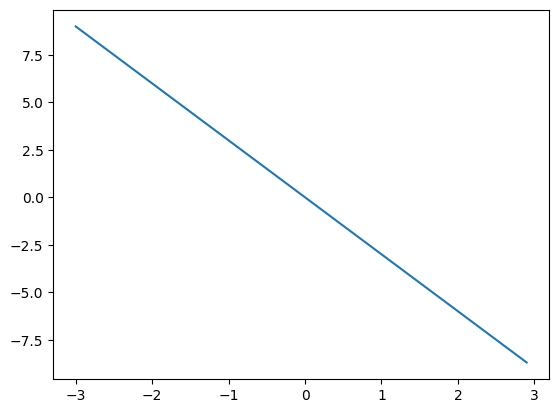

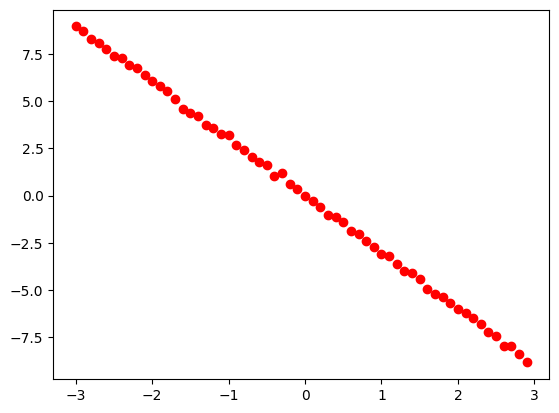

In [19]:
w = torch.tensor(-10.0, requires_grad=True)
X = torch.arange(-3,3,step=0.1).view(-1,1) #view is 1 columns and -1 as for automatic row to fit all the data
f = -3*X
import matplotlib.pyplot as plt

plt.plot(X.numpy(),f.numpy())
plt.show()

Y = f+0.1*torch.randn(X.size()) #add noise to input
plt.plot(X.numpy(),Y.numpy(),'ro') #'ro' means red ('r') circular markers ('o').
plt.show()

In [ ]:
w = torch.tensor(-10.0, requires_grad=True)
# Define the forward function (linear model)
def forward(x):
    return w * x  # w is a learnable parameter, x is the input

# Define the loss function (Mean Squared Error)
def criterion(y_pred, y):
    return torch.mean((y_pred - y)**2)  # Calculate average squared difference

learning_rate = 0.1  # Step size for gradient descent

for epoch in range(4):  # Run for 4 epochs, each interation if gradient descent is epoch
    Yhat = forward(X)  # Make predictions using current w
    loss = criterion(Yhat, Y)  # Calculate loss
    loss.backward()  # Compute gradients with respect to w

    # Update w using gradient descent
    w.data = w.data - learning_rate * w.grad.data

    # Zero out the gradients for the next iteration
    w.grad.data.zero_()




```
Weight update: w.data = w.data - learning_rate * w.grad.data
This step updates the weights based on the current gradients.
Gradient zeroing: w.grad.data.zero_()
This step happens after the weight update.
so the w.data is the new w.data without the LRand wgrad.data affect the next batch
```

**backward**


```
Computes gradients: It calculates the gradients of the loss
with respect to all tensors in the computational graph that have requires_grad=True.

Accumulates gradients: The computed gradients are accumulated in the .grad attribute of each tensor that requires gradients.
```





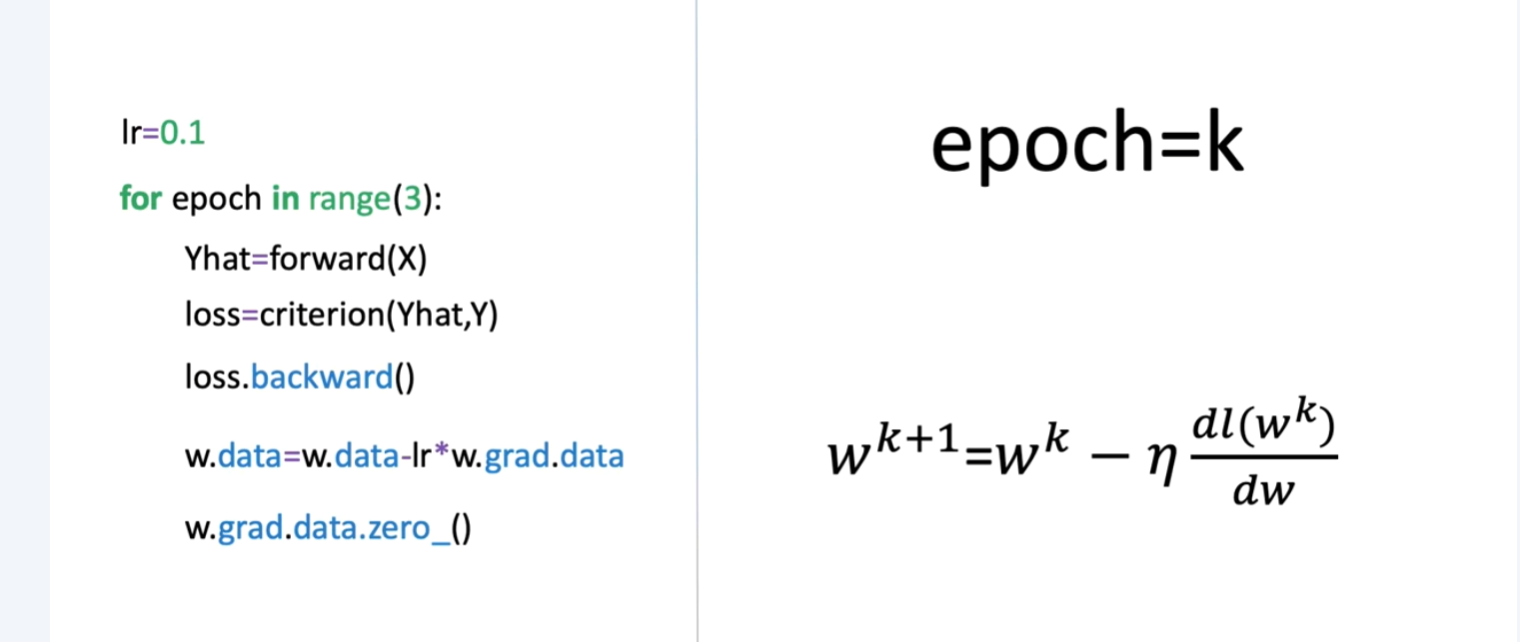

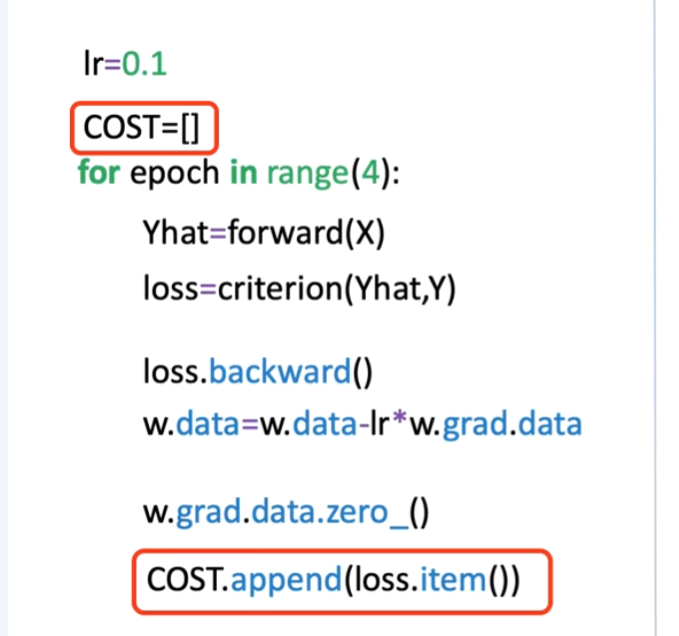

# Cost surface
slope and bias
cost is the height
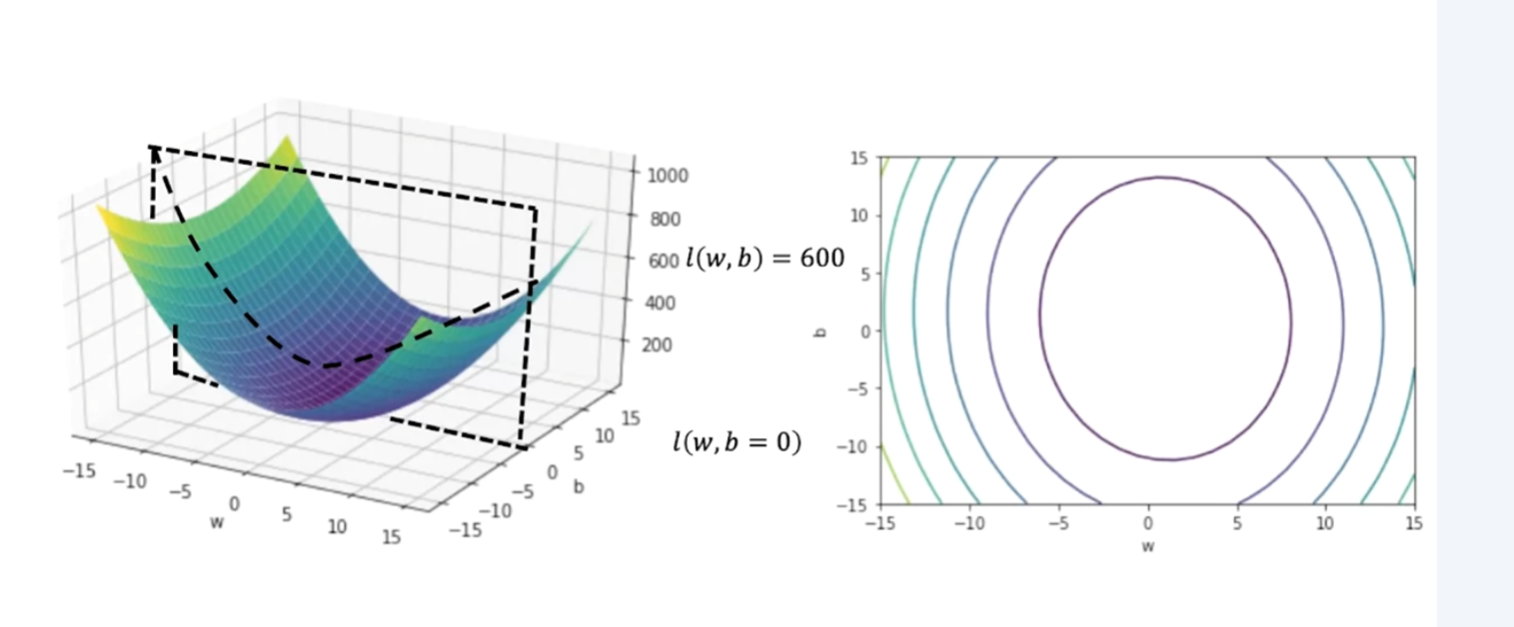

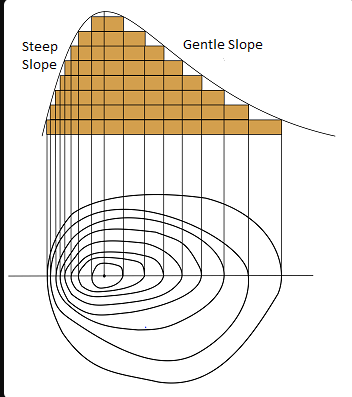

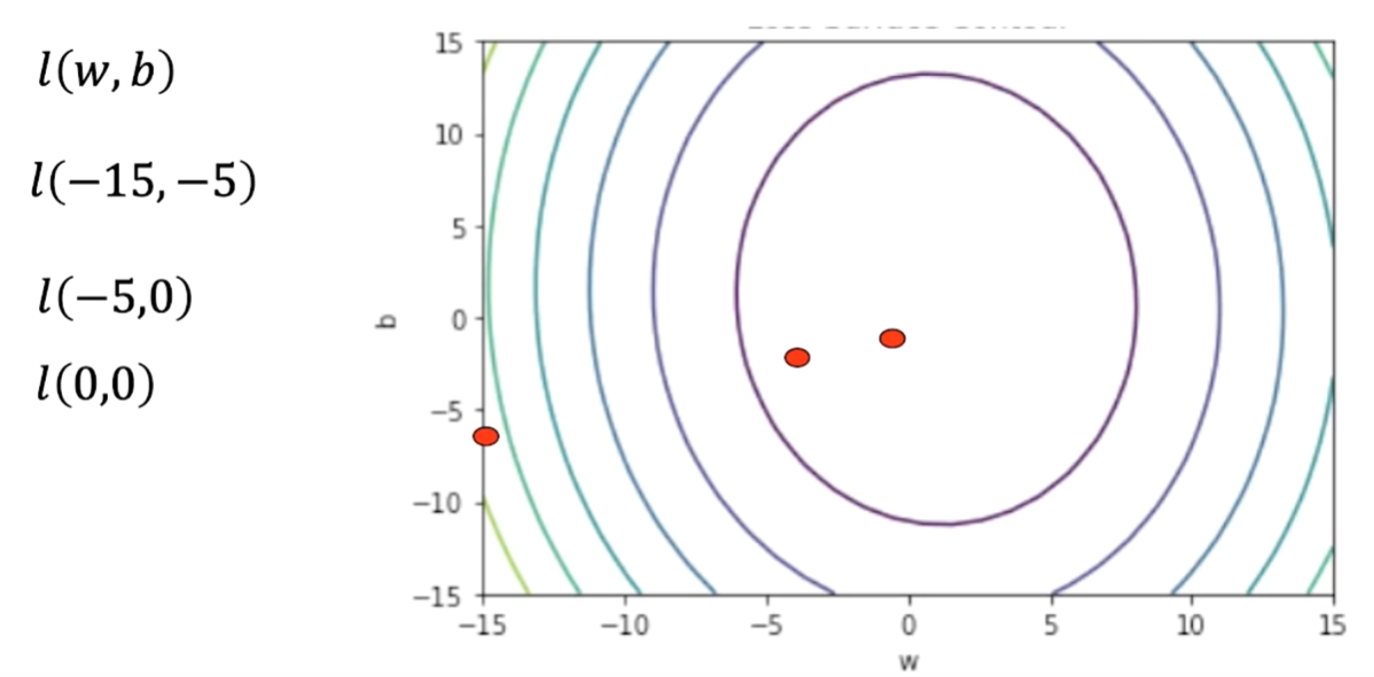

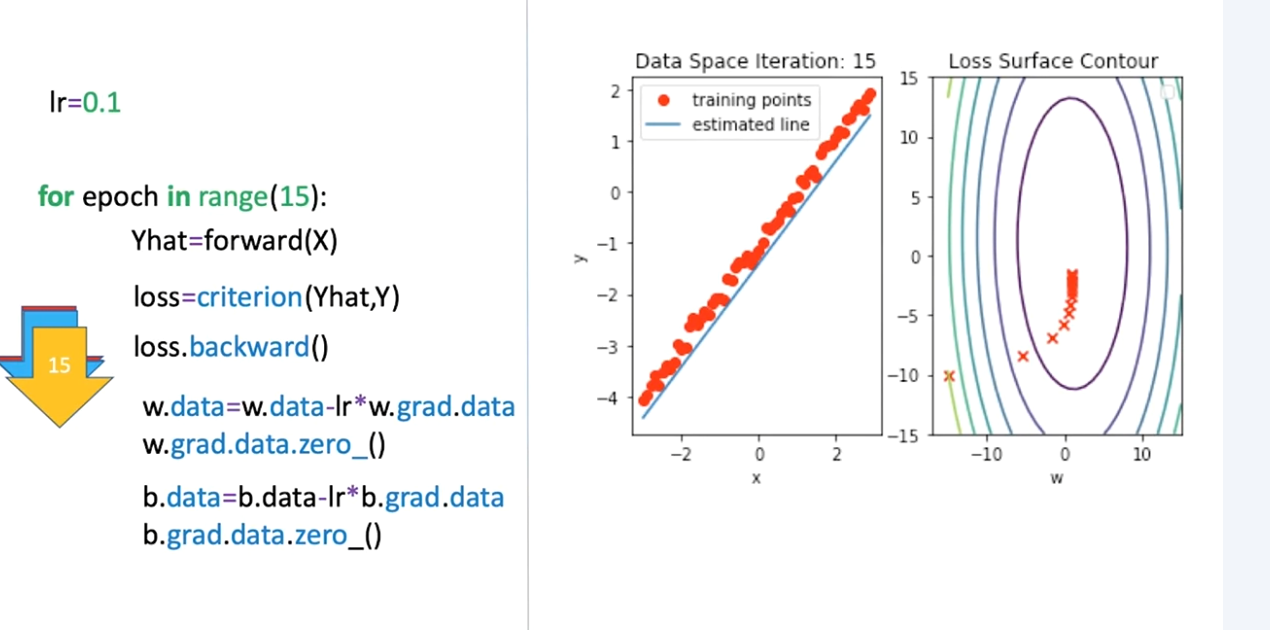
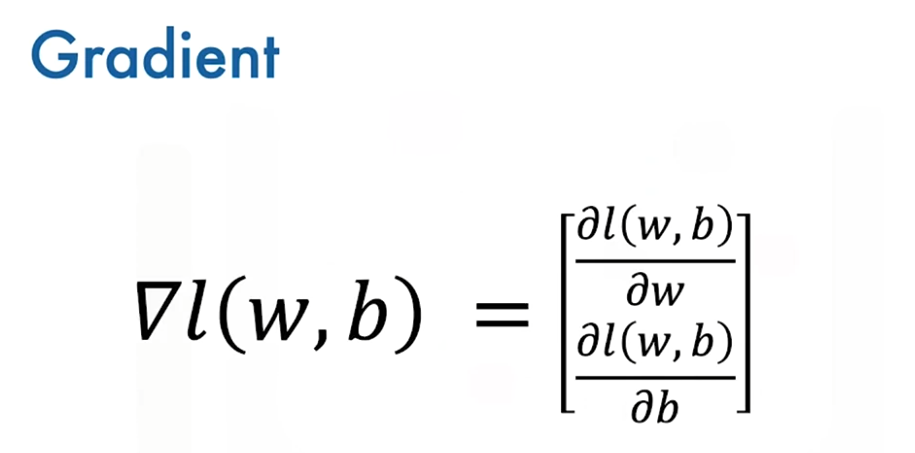



---

# Given our linear function like shown
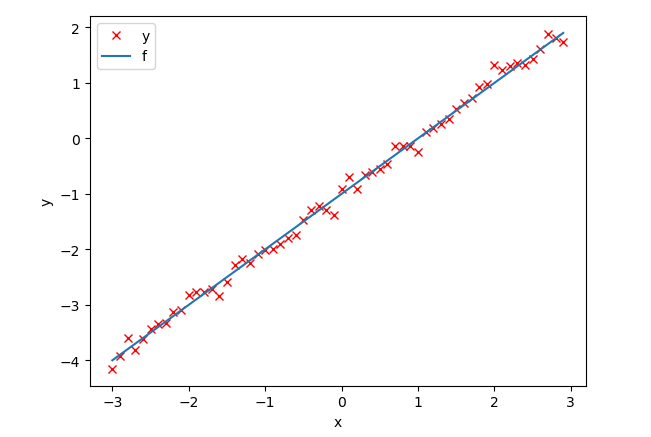

Our Loss surface is this and surface contour



1.   List item
2.   List item

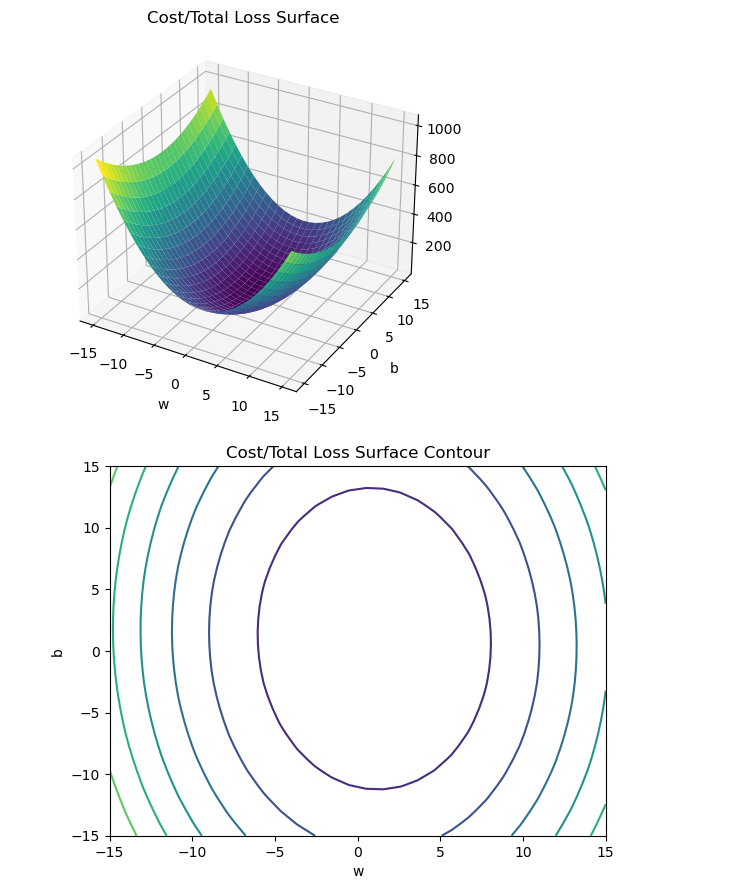

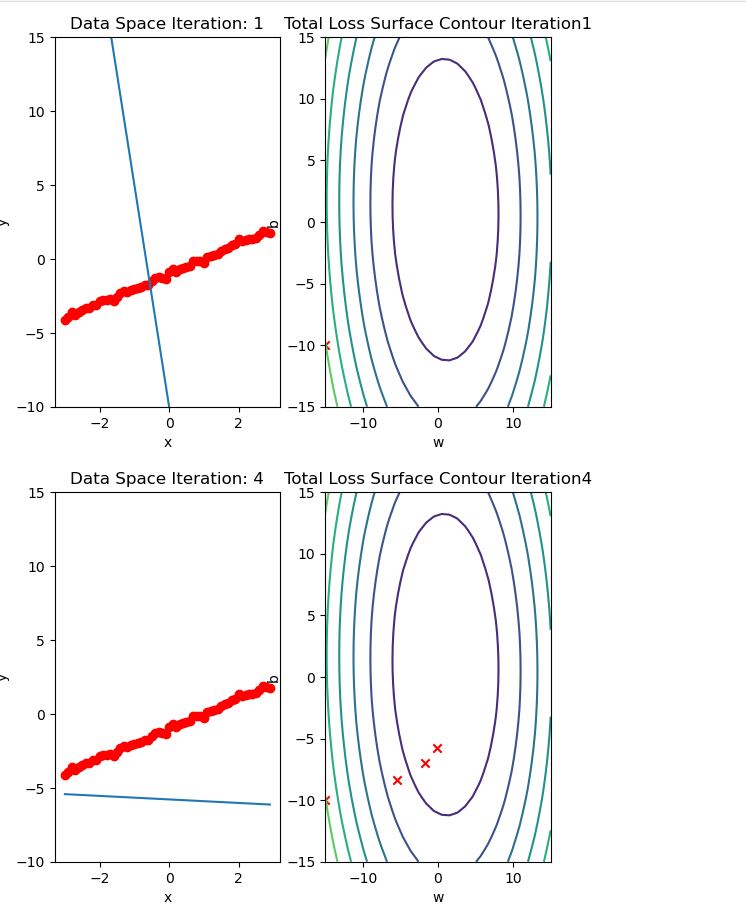

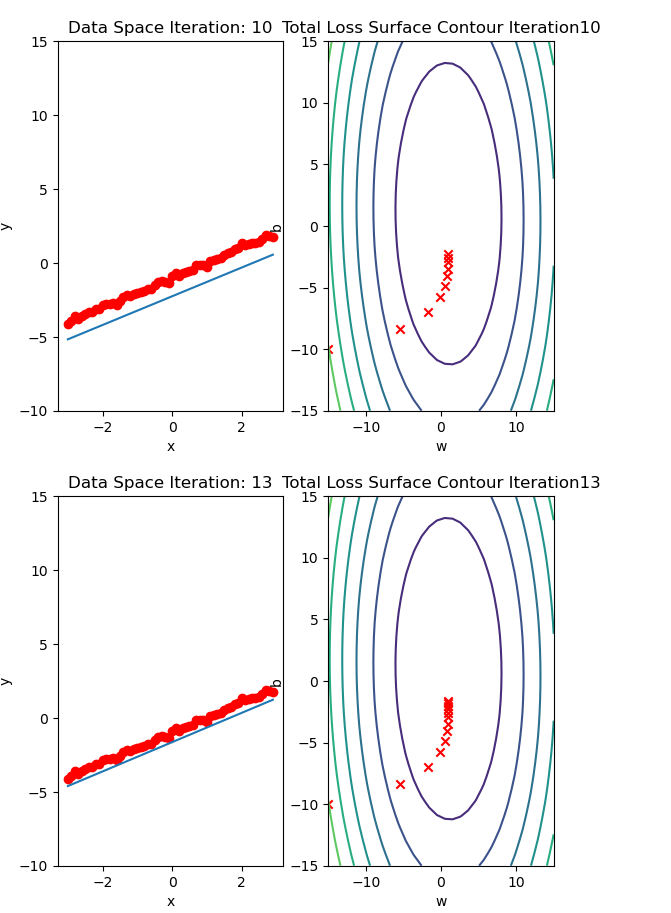

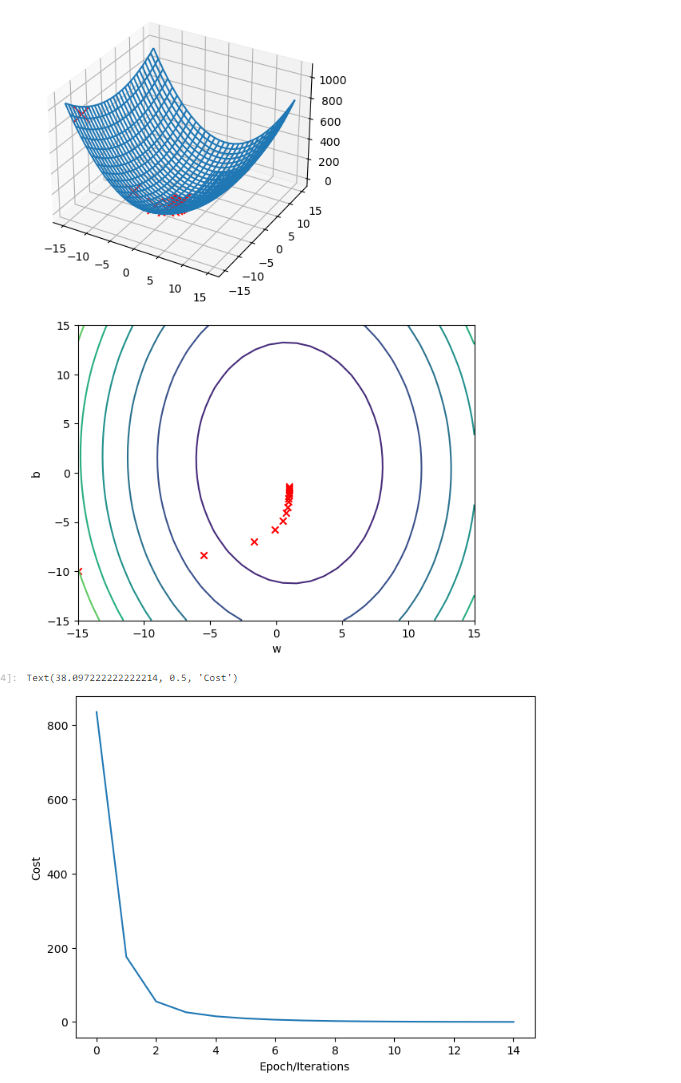